Layers A and B have the thicknesses  $d_A = 200 nm$  and  $d_B = 300 nm$ , and the dielectric constants $ϵ_A = 12$ and $ϵ_B = 3$.Compute and plot the single-frequency electric field distribution for structure of AB.

### 參數設定

In [1]:
import numpy as np
#頻率相關參數
f = 1.4
omega = 2 * np.pi * f

In [2]:
#結構重複次數
d_list = [0.2, 0.3]
d = sum(d_list)
#材料介電常數
epsi_list = [12, 3]

In [3]:
#材料相位差
delta_list = []
for epsi, a in zip(epsi_list, d_list):
    delta = 2 * omega * a * np.sqrt(epsi)
    delta_list.append(delta)
delta_array = np.array(delta_list)

In [4]:
epsi_all = epsi_list.copy()  
epsi_all.insert(0, 1)
epsi_all.append(1)

### 轉移矩陣數值分析

In [5]:
#介面反射係數
r_list = []
for i in range(len(epsi_all)-1):
    r = (np.sqrt(epsi_all[i]) - np.sqrt(epsi_all[i+1])) / \
        (np.sqrt(epsi_all[i]) + np.sqrt(epsi_all[i+1]))
    r_list.append(r)
r_array = np.array(r_list)
#介面透射係數
t_list = []
for i in range(len(epsi_all)-1):
    t = 2 * (np.sqrt(epsi_all[i])) / \
        (np.sqrt(epsi_all[i]) + np.sqrt(epsi_all[i+1]))
    t_list.append(t)
t_array = np.array(t_list)

In [6]:
#介面反透射矩陣
i = 1j
D_list = []
for idx, t in enumerate(t_array):
    r_num = r_array[idx]
    D = (1 / t) * np.array([[1, r_num],
                            [r_num, 1]])
    D_list.append(D)
D_array = np.array(D_list)

In [7]:
#材料傳遞矩陣
P_list = []
for deltas in delta_array:
    P_11 = np.exp(-i * deltas * 0.5)
    P_22 = np.exp(i * deltas * 0.5)
    P = np.array([[P_11, 0],
                  [0, P_22]])
    P_list.append(P)
P_array = np.array(P_list)

In [8]:
#轉換矩陣
M_temp = np.eye(2, 2)
for k in range(len(epsi_list)):
    M_temp = M_temp @ np.array(D_array[k])
    M_temp = M_temp @ np.array(P_array[k])
M = M_temp @ np.array(D_array[-1])

In [9]:
#反射與透射
Er = M[1,0] / M[0,0]
R_tmat = np.abs(Er**2)
T_tmat = 1 - R_tmat
print(T_tmat)

0.7757067846463688


### 散射矩陣數值分析

In [10]:
detM = M[0,0]*M[1,1] - M[0,1]*M[1,0]
S11 = -M[1,0] / M[1,1]
S21 = detM / M[1,1]
R_smat = np.abs(S11)**2
T_smat = np.abs(S21)**2
print(T_smat)

0.7757067846463689


In [11]:
import meep as mp
#模擬空間參數
resolution = 500
dpml = 1.0
sz = (10.0) + (dpml * 2.0)
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]
dimensions = 1

In [12]:
#電磁波源(平面波)
sour_z = - (d / 2) - 0.3 
sources = [mp.Source(src=mp.ContinuousSource(frequency=f),
                     component=mp.Ex,
                     center=mp.Vector3(z=sour_z))
          ]

In [13]:
#整體模擬流程(真空場)
sim_vac = mp.Simulation(cell_size=cell_size,
                        boundary_layers=pml_layers,
                        sources=sources,
                        dimensions=dimensions,
                        resolution=resolution)
#數據偵測(真空場)
tran_z = (d / 2) + 0.3
tran_vac_fr = mp.FluxRegion(center=mp.Vector3(z = tran_z))
tran_vac = sim_vac.add_flux(f, 0, 1, tran_vac_fr)
#數據模擬(真空場)  
sim_vac.run(until=20000)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000372171 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 500
time for set_epsilon = 0.00128484 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 194.631/20000.0 = 1.0% done in 4.0s, 407.0s to go
on time step 195166 (time=195.166), 2.04955e-05 s/step
Meep progress: 471.346/20000.0 = 2.4% done in 8.0s, 331.5s to go
on time step 471968 (time=471.968), 1.44508e-05 s/step
Meep progress: 748.0980000000001/20000.0 = 3.7% done in 12.0s, 308.8s to go
on time step 748688 (time=748.688), 1.44551e-05 s/step
Meep progress: 1024.647/20000.0 = 5.1% done in 16.0s, 296.3s to go
on time step 1025530 (time=1025.53), 1.44487e-05 s/step
Meep progress: 1301.891/20000.0 = 6.5% done in 20.0s, 287.2s to go
on time step 1302892 (time=1302.89), 1.44216e-05 s/step
Meep progress: 1578.896/20000.0 = 7.9% done in 24.0s, 280.0s to go
on time step 1579950 (time=1579.95), 1.44374e-05 s/step
Meep progress: 1856.075/20000.0 = 9.3% done in 28.0s, 273.7s to go
on time step 1857264 (time=1857.26), 1.44241e-05 s/step
Meep progress: 2132.819/20000.0 = 10.7% done in 32.0s, 268.1s to go
on time step 2134177 (time=2134.18), 1.4445e-05 s/step
Meep progress:

In [14]:
#紀錄通量(真空場)
T_vac = np.array(mp.get_fluxes(tran_vac))

In [15]:
#晶體(結構場)
geometry = []
z_start = - (d / 2)
for i in range(len(epsi_list)):
    center_z = z_start + (d_list[i] / 2)
    geometry.append(mp.Block(size=mp.Vector3(mp.inf, mp.inf, d_list[i]),
                             center=mp.Vector3(z=center_z),
                             material=mp.Medium(epsilon=epsi_list[i])
                            )
                 )
    z_start += d_list[i]

In [16]:
#整體模擬流程(結構場)
sim_poyn = mp.Simulation(cell_size=cell_size,
                         geometry=geometry,
                         boundary_layers=pml_layers,
                         sources=sources,
                         dimensions=dimensions,
                         resolution=resolution)
#數據偵測(結構場)
tran_z = (d / 2) + 0.3
tran_fr = mp.FluxRegion(center=mp.Vector3(z = tran_z))
tran = sim_poyn.add_flux(f, 0, 1, tran_fr)
#數據模擬(結構場)  
sim_poyn.run(until=20000)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000238895 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 500
     block, center = (0,0,-0.15)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,0.1)
          size (1e+20,1e+20,0.3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
time for set_epsilon = 0.000892162 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 271.57800000000003/20000.0 = 1.4% done in 4.0s, 290.6s to go
on time step 272001 (time=272.001), 1.47058e-05 s/step
Meep progress: 542.891/20000.0 = 2.7% done in 8.0s, 286.7s to go
on time step 543420 (time=543.42), 1.47374e-05 s/step
Meep progress: 815.163/20000.0 = 4.1% done in 12.0s, 282.4s to go
on time step 815800 (time=815.8), 1.46854e-05 s/step
Meep progress: 1087.4660000000001/20000.0 = 5.4% done in 16.0s, 278.3s to go
on time step 1088202 (time=1088.2), 1.46842e-05 s/step
Meep progress: 1359.843/20000.0 = 6.8% done in 20.0s, 274.2s to go
on time step 1360686 (time=1360.69), 1.46798e-05 s/step
Meep progress: 1632.249/20000.0 = 8.2% done in 24.0s, 270.1s to go
on time step 1633197 (time=1633.2), 1.46783e-05 s/step
Meep progress: 1904.7/20000.0 = 9.5% done in 28.0s, 266.0s to go
on time step 1905746 (time=1905.75), 1.46763e-05 s/step
Meep progress: 2177.079/20000.0 = 10.9% done in 32.0s, 262.0s to go
on time step 2178176 (time=2178.18), 1.46827e-05 s/step
Meep prog

In [17]:
#紀錄通量(真空場)
T_str = np.array(mp.get_fluxes(tran))
T_meep = T_str / T_vac
print(T_meep)

[0.77558782]


/home/xin_314514066/miniconda/envs/mp/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/xin_314514066/miniconda/envs/mp/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


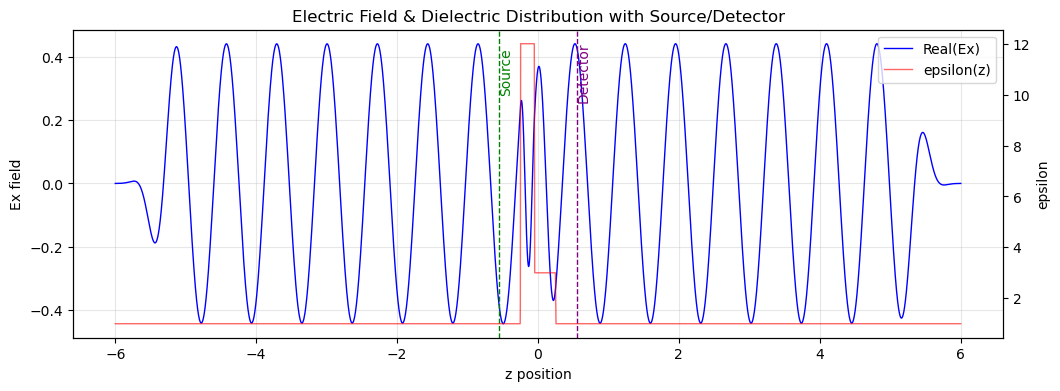

In [18]:
#電場分布
from matplotlib import pyplot as plt 
z_points = np.linspace(-sz/2, sz/2, int(resolution * sz))
ex_data = []
eps_data = []
for z in z_points:
    ex = sim_poyn.get_field_point(mp.Ex, mp.Vector3(z=z))
    eps = sim_poyn.get_epsilon_point(mp.Vector3(z=z))
    ex_data.append(ex)
    eps_data.append(eps)
ex_data = np.array(ex_data)
eps_data = np.array(eps_data)
#場分布+介電常數分布
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
#電場 Ex
ax1.plot(z_points, np.real(ex_data), 'b-', label='Real(Ex)', linewidth=1)
ax1.set_xlabel('z position')
ax1.set_ylabel('Ex field')
ax1.grid(True, alpha=0.3)
#介電常數
ax2 = ax1.twinx()
ax2.plot(z_points, eps_data, 'r-', label='epsilon(z)', linewidth=1, alpha=0.6)
ax2.set_ylabel('epsilon')
#Source 與 Detector 位置
ax1.axvline(sour_z, color='green', linestyle='--', linewidth=1)
ax1.text(sour_z, np.max(np.real(ex_data))*0.8, 'Source', color='green', 
         rotation=90, verticalalignment='center')
ax1.axvline(tran_z, color='purple', linestyle='--', linewidth=1)
ax1.text(tran_z, np.max(np.real(ex_data))*0.8, 'Detector', color='purple',
         rotation=90, verticalalignment='center')
#繪圖
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
ax1.set_title('Electric Field & Dielectric Distribution with Source/Detector')
plt.show()